In [30]:
import numpy as np
from generate_hnb import *
import pandas as pd
from simulate_function import *

In [ ]:
#10 per 20s
#200 -> 2*200= 400s ~ 7 minutes

In [ ]:
k=2
data=datasets = simulation_plan(
    B=200,
    n=300,
    k=2,
    cov_type="binary",
    beta1_vals=np.linspace(-2, 2, 9),
    gamma1_vals=np.linspace(-2, 2, 9),
    alpha1_vals=np.linspace(-2, 2, 9)
)


Generating: β1=-2.0, γ1=-2.0, α1=-2.0
3.7933333333333334
3.5
4.423333333333333
3.62
3.29
3.3833333333333333
3.6133333333333333
3.5166666666666666
2.92
3.2466666666666666
3.1766666666666667
3.5966666666666667
3.4433333333333334
3.933333333333333
3.5366666666666666
3.2266666666666666
4.333333333333333
3.0233333333333334
3.5533333333333332
3.32
3.3566666666666665
3.44
3.42
3.9633333333333334
2.93
4.286666666666667
3.276666666666667
3.6066666666666665
4.4
3.296666666666667
4.1066666666666665
2.756666666666667
3.09
3.216666666666667
4.413333333333333
4.303333333333334
3.61
3.256666666666667
3.29
3.8333333333333335
3.6766666666666667
3.6066666666666665
3.493333333333333
3.5233333333333334
3.3
3.4433333333333334
3.7933333333333334
3.473333333333333
3.2866666666666666
3.8266666666666667
4.38
3.1533333333333333
3.513333333333333
3.5
3.82
3.236666666666667
3.29
3.7466666666666666
3.9366666666666665
3.29
4.046666666666667
3.8
2.723333333333333
3.9566666666666666
2.7933333333333334
3.32
3.39333333

In [3]:
import pickle

In [ ]:


# Save results
with open('simulation_dataset_01.pkl', 'wb') as f:
    pickle.dump(data, f)

In [4]:
# Load later
with open('simulation_dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [22]:
len(data)

145800

In [ ]:
len(data[(data[0]['params']['beta1']==-2) & (data[0]['params']['gamma1']==-2) & (data[0]['params']['alpha1']==-2)])

C:\Users\STD_IndTrainee3\AppData\Local\Temp\ipykernel_5272\3037761798.py:1: DeprecationWarning: In future, it will be an error for 'np.bool' scalars to be interpreted as an index
  len(data[(data[0]['params']['beta1']==-2) & (data[0]['params']['gamma1']==-2) & (data[0]['params']['alpha1']==-2)])


2

In [80]:
for i in data:
    if (i['params']['beta1']==0) and (i['params']['gamma1']==0) and (i['params']['alpha1']==2):
        df=i['data']
        print(df['y'].value_counts())
        break

y
0    154
2    146
Name: count, dtype: int64


In [ ]:
l=[]
for i in data:
    for beata in np.linspace(-2, 2, 9):
        for gamma in np.linspace(-2, 2, 9):
            for alpha in np.linspace(-2, 2, 9):
                if (i['params']['beta1']==beata) and (i['params']['gamma1']==gamma) and (i['params']['alpha1']==alpha):
                    df=i['data']
                    l.append(len(df['y'].value_counts()))
                    

In [85]:
np.mean(l)

np.float64(5.087798353909465)

In [19]:
import matplotlib.pyplot as plt
plt.hist(l, bins=20)

NameError: name 'l' is not defined

In [15]:
abg=[]
for i in data:
    for beata in np.linspace(-2, 2, 9):
        for gamma in np.linspace(-2, 2, 9):
            for alpha in np.linspace(-2, 2, 9):
                if (i['params']['beta1']==beata) and (i['params']['gamma1']==gamma) and (i['params']['alpha1']==alpha):
                    df=i['data']
                    p_0 = round(df['y'].value_counts().get(0, 0) / len(df), 5)
                    p_k = round(df['y'].value_counts().get(k, 0) / len(df), 5)
                    p_p = max(1 - p_0 - p_k, 0)
                    abg.append({
                            'beta1':beata,
                            'gamma1':gamma,
                            'alpha1':alpha,
                            'n_unique': len(df['y'].value_counts()), 
                            'p_0': p_0,
                            'p_k': p_k,
                            'p_p': p_p
                    })
                    

In [16]:
abg_df = pd.DataFrame(abg)

In [17]:
pd.DataFrame(abg).duplicated().sum()

np.int64(68785)

In [14]:
abg_df.to_csv('parameter_combinations_with_gt5_classes.csv', index=False)

(array([8.7039e+04, 1.8566e+04, 5.8950e+03, 8.6620e+03, 6.3100e+03,
        2.5640e+03, 4.0870e+03, 3.2730e+03, 1.2820e+03, 2.2500e+03,
        1.8210e+03, 7.5700e+02, 1.1540e+03, 9.6700e+02, 3.5800e+02,
        5.2600e+02, 2.3400e+02, 4.0000e+01, 1.2000e+01, 3.0000e+00]),
 array([ 2.  ,  3.65,  5.3 ,  6.95,  8.6 , 10.25, 11.9 , 13.55, 15.2 ,
        16.85, 18.5 , 20.15, 21.8 , 23.45, 25.1 , 26.75, 28.4 , 30.05,
        31.7 , 33.35, 35.  ]),
 <BarContainer object of 20 artists>)

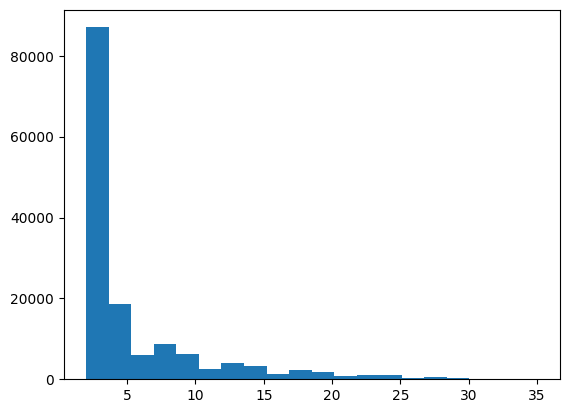

In [20]:
plt.hist(abg_df['n_unique'], bins=20)

(array([  109.,  1514.,  5838., 11746., 12487.,  9725.,  9185.,  7681.,
         7861.,  8111.,  6956.,  8132.,  7838.,  9651.,  9962., 12558.,
        11050.,  4416.,   926.,    54.]),
 array([0.21667  , 0.2453365, 0.274003 , 0.3026695, 0.331336 , 0.3600025,
        0.388669 , 0.4173355, 0.446002 , 0.4746685, 0.503335 , 0.5320015,
        0.560668 , 0.5893345, 0.618001 , 0.6466675, 0.675334 , 0.7040005,
        0.732667 , 0.7613335, 0.79     ]),
 <BarContainer object of 20 artists>)

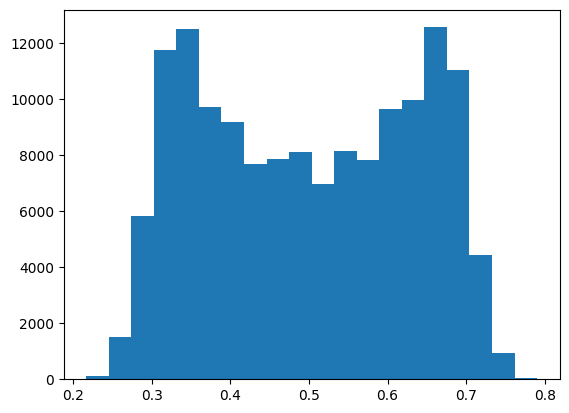

In [21]:
plt.hist(abg_df['p_0'], bins=20)

(array([1.0800e+02, 1.7990e+03, 8.2640e+03, 1.9705e+04, 2.1416e+04,
        1.5475e+04, 1.3611e+04, 1.0029e+04, 9.6090e+03, 7.3430e+03,
        7.7860e+03, 6.8150e+03, 5.7900e+03, 5.6540e+03, 4.5400e+03,
        4.2530e+03, 2.5190e+03, 8.7500e+02, 2.0100e+02, 8.0000e+00]),
 array([0.21     , 0.2386665, 0.267333 , 0.2959995, 0.324666 , 0.3533325,
        0.381999 , 0.4106655, 0.439332 , 0.4679985, 0.496665 , 0.5253315,
        0.553998 , 0.5826645, 0.611331 , 0.6399975, 0.668664 , 0.6973305,
        0.725997 , 0.7546635, 0.78333  ]),
 <BarContainer object of 20 artists>)

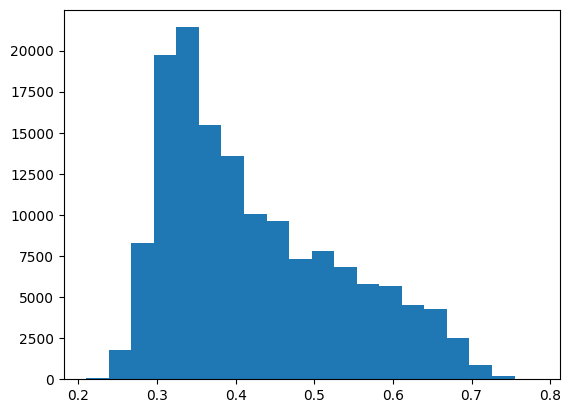

In [22]:
plt.hist(abg_df['p_k'], bins=20)

(array([8.2196e+04, 6.6460e+03, 7.1890e+03, 4.8820e+03, 5.3860e+03,
        5.3950e+03, 4.1650e+03, 4.3600e+03, 3.7500e+03, 3.7050e+03,
        3.9090e+03, 3.2940e+03, 3.0010e+03, 2.7240e+03, 2.3300e+03,
        1.7050e+03, 7.8700e+02, 2.9700e+02, 7.0000e+01, 9.0000e+00]),
 array([0.   , 0.024, 0.048, 0.072, 0.096, 0.12 , 0.144, 0.168, 0.192,
        0.216, 0.24 , 0.264, 0.288, 0.312, 0.336, 0.36 , 0.384, 0.408,
        0.432, 0.456, 0.48 ]),
 <BarContainer object of 20 artists>)

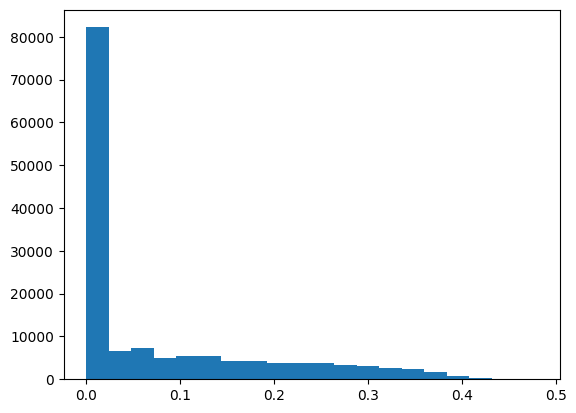

In [23]:
plt.hist(abg_df['p_p'], bins=20)

In [25]:
(abg_df['p_p']==0).mean()

np.float64(0.42795610425240055)